Để thực hiện chiến dịch Marketing cho chương trình gửi tiền có kì hạn, một ngân hàng dựa trên bộ dữ liệu người dùng được cho trong mẫu sau để tìm hiểu khả năng người dùng sẽ đăng kí chương trình gửi tiền có kì hạn ở ngân hàng hay không?

# Đọc dataset ban đầu

1. Thao tác dữ liệu với dataset 'bank.csv'

In [146]:
import numpy as np

import pandas as pd

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [147]:
with open('bank.csv') as f:
    df = pd.read_csv(f, dtype={'age': np.int64, 'balance': np.int64, 'day': np.int64 , 'duration': np.int64, 'pdays': np.int64})

In [148]:
df.head(12)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [150]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


2. Lấy ra 5 thuộc tính có số lượng giá trị rỗng nhiều nhất

In [151]:
total = df.isnull().sum().sort_values(ascending=False)

percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


Có thể thấy không có thuộc tính nào bị thiếu dữ liệu (0%).

3. Xem xét thống kê giữa thuộc tính Độ tuổi (age), Nơi ở (housing) và có khoản vay nào chưa (loan)

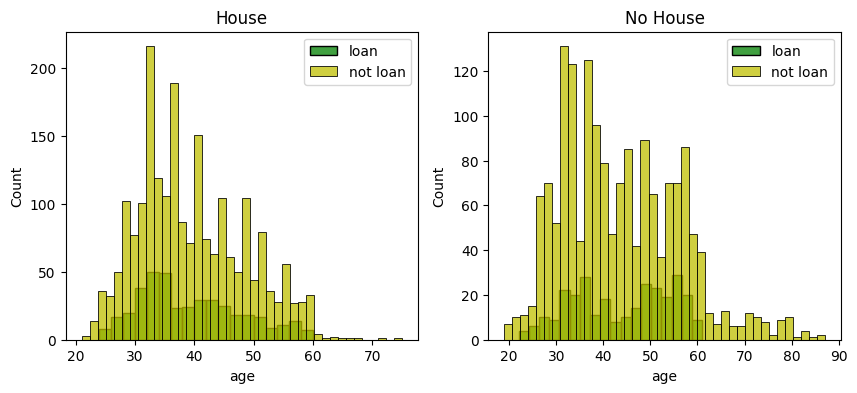

In [152]:
loan = 'loan'
not_loan = 'not loan'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

housing = df[df['housing']=='yes']
no_housing = df[df['housing']=='no']

ax = sns.histplot(housing[housing['loan']=='yes'].age.dropna(), bins=18, label = loan, ax = axes[0], kde =False, color='g')
ax = sns.histplot(housing[housing['loan']=='no'].age.dropna(), bins=40, label = not_loan, ax = axes[0], kde =False, color='y')
ax.legend()
ax.set_title('House');

ax = sns.histplot(no_housing[no_housing['loan']=='yes'].age.dropna(), bins=18, label = loan, ax=axes[1], kde=False, color='g')
ax = sns.histplot(no_housing[no_housing['loan']=='no'].age.dropna(), bins=40, label = not_loan, ax=axes[1], kde=False, color='y')
ax.legend()
ax.set_title('No House');

Từ biểu đồ trên có thể rút ra vài nhận xét như sau:
    •	Nhìn chung xác suất có khoản vay ở những người không có nhà cao hơn những người có nhà.
    •	Với những người có nhà, xác suất có khoản vay cao ở độ tuổi 25 - 60. Sau 60 tuổi, khoản vay nợ càng ngày càng thấp và có dấu hiệu dừng hẳn trước tuổi 70 hoặc 75.
    •	Với những người không có nhà, xác suất có khoản vay cao ở độ tuổi 28 - 62. Tuy nhiên sau 62 tuổi, khoản vay nợ vẫn kéo dài đến 87 tuổi và có dấu hiệu dừng hẳn trước tuổi 90.

Muốn thực hiện thống kê ta phải có được những thuộc tính dạng số (int,float,double,...). Tuy nhiên trong dữ liệu mô tả hiện thời chỉ có age, balance, duration, day, campaign, pdays, previous là ở dạng số còn lại ở dạng object. Những thuộc tính trên chưa đủ dữ kiện để có thể tiến hành phân tích yếu tố ảnh hưởng đến khả năng đăng ký vay nợ của khách hàng. Do đó, để có thể thực hiện được thống kê phải tiến hành chuyển đổi vài thuộc tính sang kiểu dữ liệu dạng số (int64). 

# Thay thế dữ liệu

Có thể thấy không có thuộc tính nào bị thiếu dữ liệu nên có thể suy ra các dữ liệu có mối liên hệ với nhau và liên tục. Tuy nhiên từ hàm df.info() ta thấy được dữ liệu đa số ở dạng object nên không thể tiến hành tính toán. Do đó, ta tiến hành chuyển đổi dữ liệu sang dạng số (int64).

In [153]:
#Thay thế những giá trị yes, no thành 1,0 của tất cả các cột
# df['loan'] = df['loan'].replace(['yes', 'no'], [1, 0])
df = df.replace(['yes', 'no'], [1, 0])

In [154]:
df.head(12)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
5,35,management,single,tertiary,0,747,0,0,cellular,23,feb,141,2,176,3,failure,0
6,36,self-employed,married,tertiary,0,307,1,0,cellular,14,may,341,1,330,2,other,0
7,39,technician,married,secondary,0,147,1,0,cellular,6,may,151,2,-1,0,unknown,0
8,41,entrepreneur,married,tertiary,0,221,1,0,unknown,14,may,57,2,-1,0,unknown,0
9,43,services,married,primary,0,-88,1,1,cellular,17,apr,313,1,147,2,failure,0


4. Xem xét thống kê giữa thuộc tính Tình trạng hôn nhân (Marital) và đồng ý đăng ký vay vốn (y) với Khoản vay nợ (loan), phân biệt theo housing

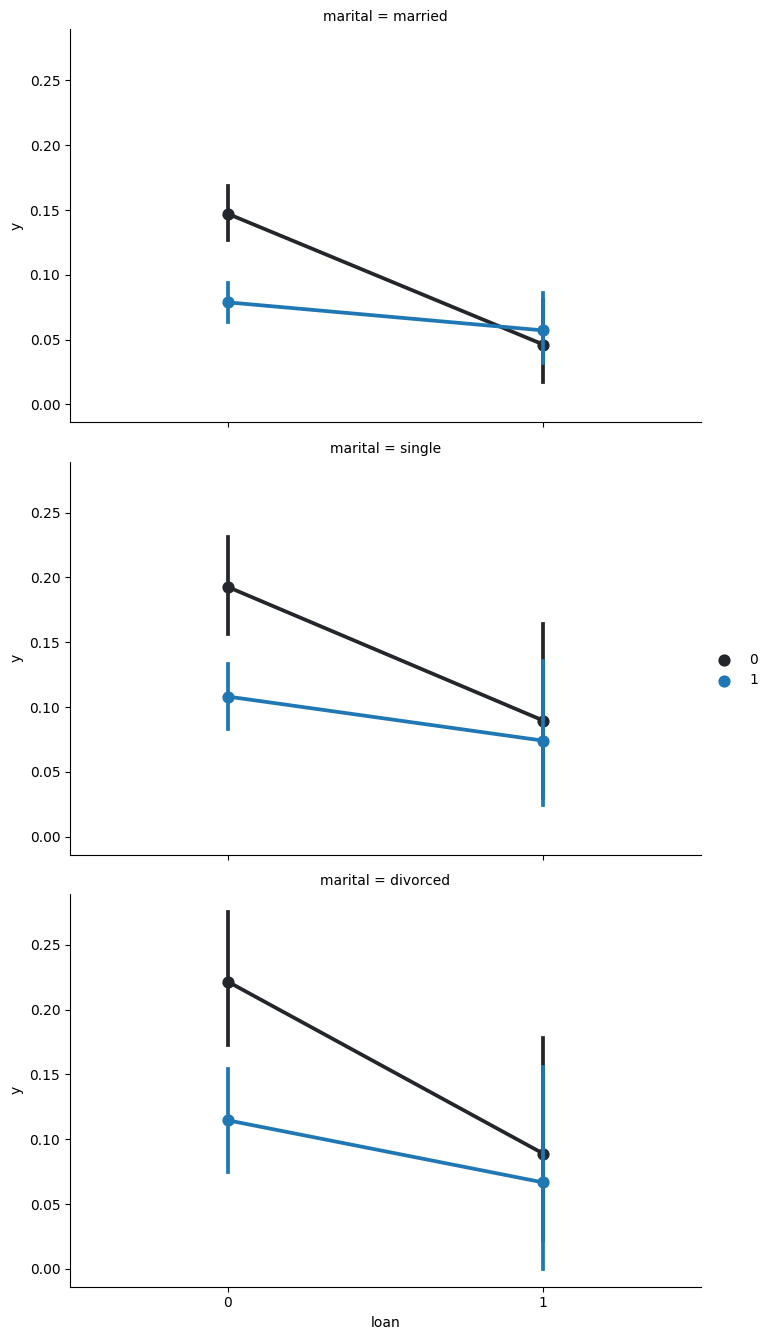

In [155]:
FacetGrid = sns.FacetGrid(df, row='marital', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'loan', 'y', 'housing', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

*Chú thích: 
1: housing
0: no_housing

Từ biểu đồ trên có thể thấy được, thuộc tính Marital(tình trạng hôn nhân) có thể ảnh hưởng đến khả năng có thể vay vốn phụ thuộc vào nơi ở (housing)
    Với khách hàng đã kết hôn, người có nhà có khả năng vay vốn thấp hơn và người không có nhà có khả năng vay vốn cao hơn.
    Với khách hàng đã ly hôn, người có nhà có khả nâng vay vốn thấp hơn so với người người không có nhà.
    Với khách hàng đang độc thân, người có nhà và người không có nhà không có sự chênh lệch lớn tại vị trí loan1. Do đó, chúng ta tiếp tục so sánh với thuộc tính tiếp theo, đó là loan. Ta có thể thấy thuộc tính loan tại người không có nhà có khả năng vay vốn cao hơn.
    => Từ đó, ta thấy được, thuộc tính loan có ảnh hưởng đến khả năng vay vốn của khách hàng. Vì thế, tiếp tục tìm hiểu kỹ hơn về sự phụ thuộc giữa thuộc tính này với thuộc tính quyết định.

<Axes: xlabel='y', ylabel='loan'>

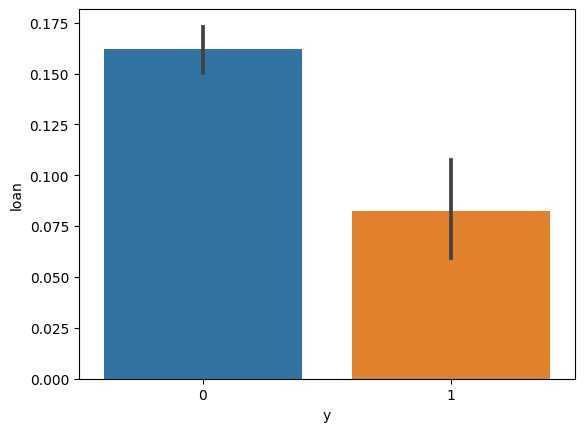

In [156]:
sns.barplot(x='y', y='loan', data=df)

Từ biểu đồ này có thể thấy khả năng có thể vay vốn của người không có nợ là cao hơn.

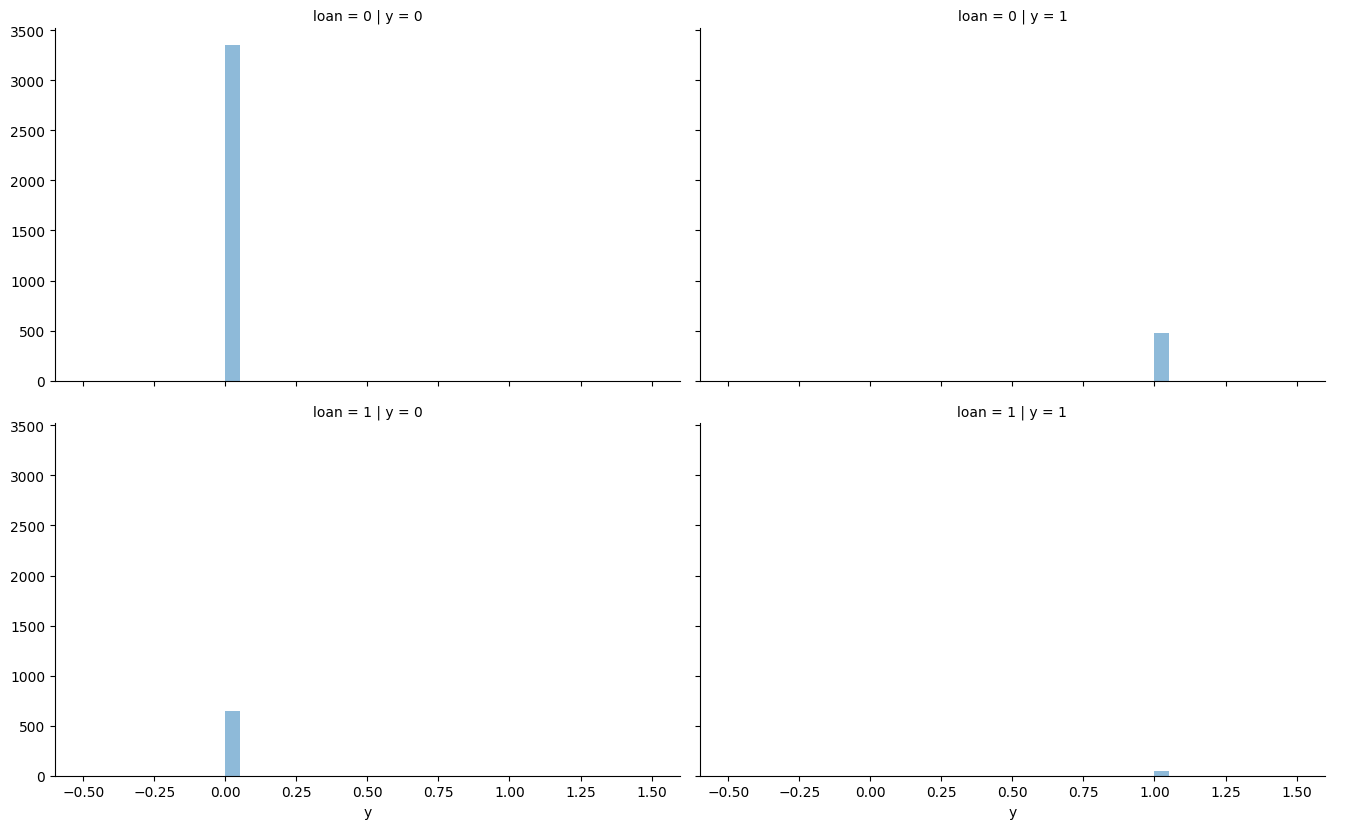

In [157]:
grid = sns.FacetGrid(df, col='y', row='loan', height=4.2, aspect=1.6)
grid.map(plt.hist, 'y', alpha=.5, bins=20)
grid.add_legend()

Từ đồ thị trên có thể xác nhận nhận định bên trên, người không có nợ có khả năng vay vốn cao hơn. Bên cạnh đó người có nợ lại có khả năng đồng ý vay vốn thấp nhấp.

Xem xét thống kê giữa thuộc tính Trình độ học vấn (Education) và đồng ý đăng ký vay vốn (y) với Khoản vay nợ (loan), phân biệt theo housing

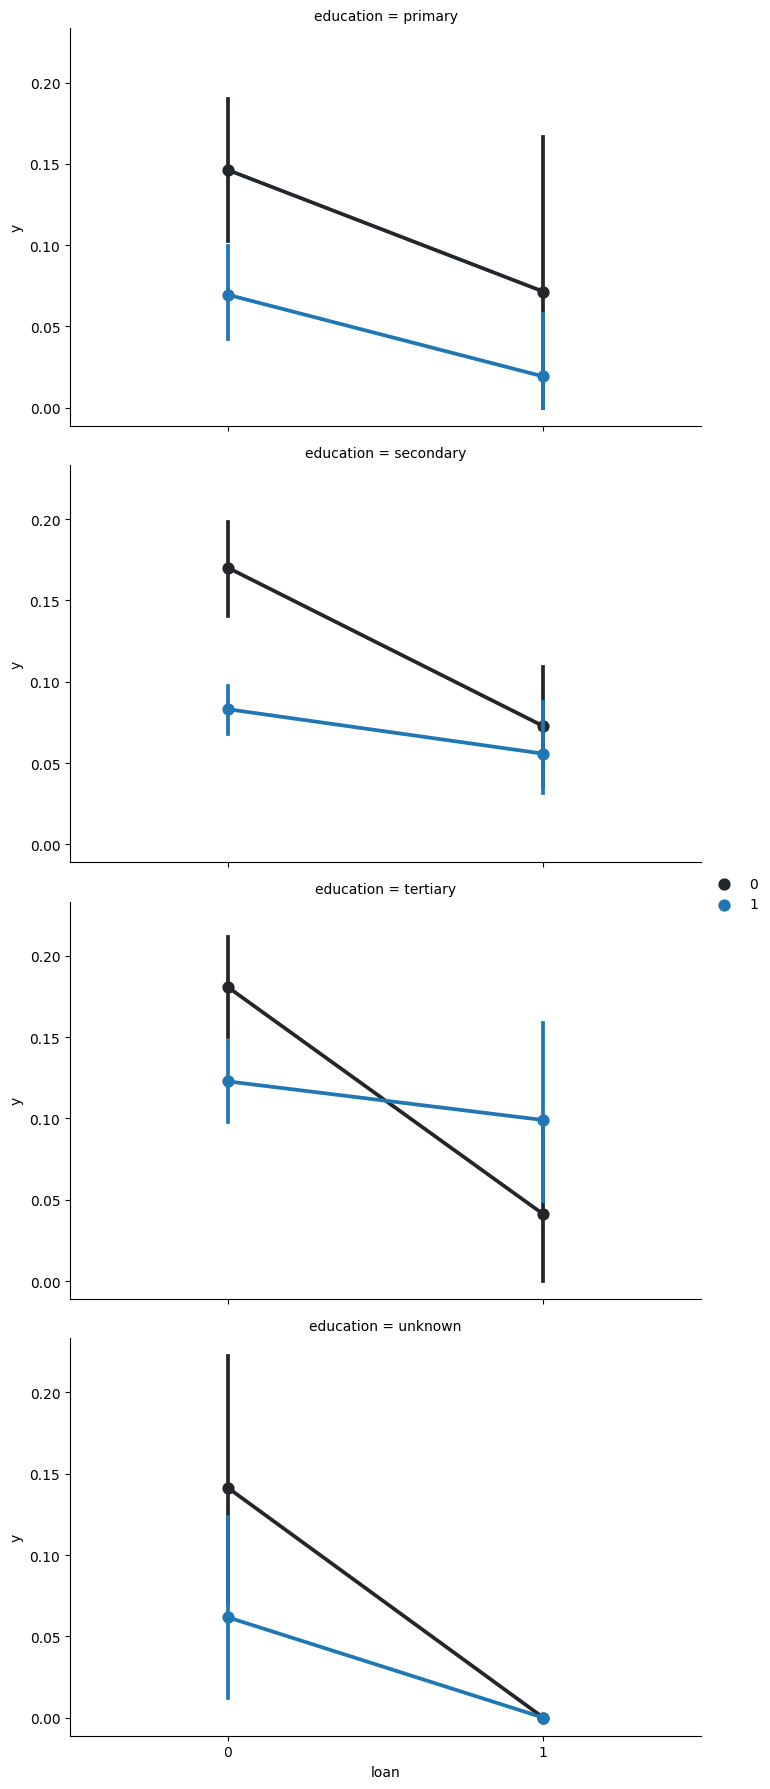

In [158]:
FacetGrid = sns.FacetGrid(df, row='education', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'loan', 'y', 'housing', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

Từ biểu đồ trên có thể thấy được, thuộc tính Education có thể ảnh hưởng đến khả năng có thể vay vốn phụ thuộc vào nơi ở (housing)
    Với primary, người có nhà có khả năng vay vốn thấp hơn và người không có nhà có khả năng vay vốn cao hơn.
    Với secondary, người có nhà có khả nâng vay vốn thấp hơn so với người người không có nhà.
    Với tertiary, người có nhà có khả nâng vay vốn thấp hơn so với người người không có nhà.
    Với unknown, người có nhà và người không có nhà không có sự chênh lệch lớn tại vị trí loan0. Do đó, chúng ta tiếp tục so sánh với thuộc tính tiếp theo, đó là loan. Ta có thể thấy thuộc tính loan tại người không có nhà có khả năng vay vốn cao hơn.
    => Từ đó, ta thấy được, thuộc tính loan có ảnh hưởng đến khả năng vay vốn của khách hàng. Vì thế, tiếp tục tìm hiểu kỹ hơn về sự phụ thuộc giữa thuộc tính này với thuộc tính quyết định.

<Axes: xlabel='y', ylabel='loan'>

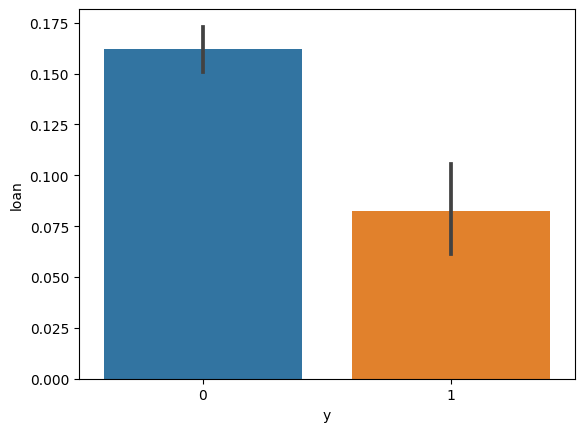

In [159]:
sns.barplot(x='y', y='loan', data=df)

Tuy nhiên những nhận định vẫn không thay đổi, người không có nhà sẽ có khả năng đồng ý vay vốn cao hơn.

5. Thống kê số khách hàng có nghề nghiệp

In [160]:
jobs = {"unknown":0,"admin.":1,"unemployed":2,"management":3,"housemaid":4,"entrepreneur":5,"student":6, "blue-collar":7,"self-employed":8,"retired":9,"technician":10,"services":11}

for dataset in [df]:
    dataset['job']= dataset['job'].map(jobs)

In [161]:
for dataset in [df]:
    dataset.loc[dataset['job'] != 2, 'employed'] = 1
    dataset.loc[dataset['job'] == 2, 'employed'] = 0
    dataset['employed'] = dataset['employed'].astype(int)
df['employed'].value_counts()

1    4393
0     128
Name: employed, dtype: int64

Số khách hàng có nghề nghiệp là 4393 người.
Số khách hàng không có nghề nghiệp là 128 người.

Vẽ biểu đồ biểu diễn mối quan hệ giữa khách hàng có nghề nghiệp và khả năng vay nợ

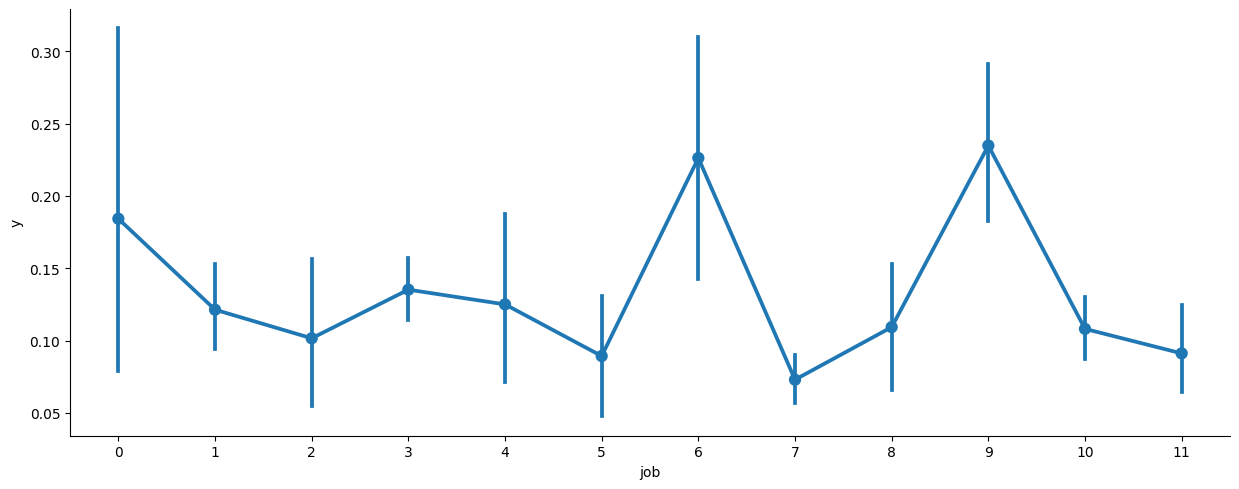

In [162]:
axes = sns.catplot(x='job', y='y', data=df, aspect=2.5, kind='point',)

Nhìn chung khả năng có thể vay nợ ở các ngành nghề khác không có nhiều biến động, tuy nhiên student(job6) và retired(job9) lại có khả năng vay vốn cao hơn hẳn.

# Tiền xử lý dữ liệu

In [163]:
#Thực hiện lấy tất cả giá trị rỗng nhất
total = df.isnull().sum().sort_values(ascending=False)

percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(17)

,Total,%
age,0,0.0
job,0,0.0
y,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
day,0,0.0


Qua kết quả ta thấy được, không có dữ liệu bị thiếu. Do đó, ta không cần phải thực hiện xử lý dữ liệu một lần nữa.

# Xem xét lại các thuộc tính và tiến hành chuyển đổi tất cả dữ liệu trong dataset

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   int64 
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
 17  employed   4521 non-null   int32 
dtypes: int32(1), int64(12), object(5)
memory usage: 618.2+ KB


Nhìn chung, ta có thể xử lý các thuộc tính Marital, Education, Contact, Month, Poutcome.

In [165]:
maritals = {"married":1,"divorced":2,"single":3}

for dataset in [df]:
    dataset['marital']= dataset['marital'].map(maritals)

In [166]:
educations = {"unknown":0,"primary":1,"secondary":2,"tertiary":3}

for dataset in [df]:
    dataset['education']= dataset['education'].map(educations)

In [167]:
contacts = {"cellular":1,"telephone":2,"unknown":3}

for dataset in [df]:
    dataset['contact']= dataset['contact'].map(contacts)

In [168]:
months = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}

for dataset in [df]:
    dataset['month']= dataset['month'].map(months)

In [169]:
Poutcome = {"success":1,"failure":2,"other":3,"unknown":4}

for dataset in [df]:
    dataset['poutcome']= dataset['poutcome'].map(Poutcome)

Phân loại nhóm tuổi

Chia thuộc tính age thành 8 nhóm, sao cho số phần tử trong nhóm cân bằng.
    Nhóm 1: dưới 30 tuổi
    Nhóm 2: trên 30 tuổi đến 40 tuổi
    Nhóm 3: trên 40 tuổi đến 50 tuổi
    Nhóm 4: trên 50 tuổi đến 60 tuổi
    Nhóm 5: trên 60 tuổi đến 70 tuổi
    Nhóm 6: trên 70 tuổi đến 80 tuổi
    Nhóm 7: trên 80 tuổi đến 90 tuổi
    Nhóm 8: trên 90 tuổi

In [170]:
for dataset in [df]:
    dataset['age']=dataset['age'].astype(int)
    dataset.loc[dataset['age']<30,'age']=0
    dataset.loc[(dataset['age']>=30) & (dataset['age']<40),'age']=1
    dataset.loc[(dataset['age']>=40) & (dataset['age']<50),'age']=2
    dataset.loc[(dataset['age']>=50) & (dataset['age']<60),'age']=3
    dataset.loc[(dataset['age']>=60) & (dataset['age']<70),'age']=4
    dataset.loc[(dataset['age']>=70) & (dataset['age']<80),'age']=5
    dataset.loc[(dataset['age']>=80) & (dataset['age']<90),'age']=6
    dataset.loc[(dataset['age']>=90),'age']=7

In [171]:
df['age'].value_counts()

1    1808
2    1203
3     854
0     482
4     113
5      47
6      14
Name: age, dtype: int64

Kiểm tra lại dữ liệu

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int32
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
 17  employed   4521 non-null   int32
dtypes: int32(2), int64(16)
memory usage: 600.6 KB


In [111]:
for dataset in [df]:
    dataset['contact'] = dataset['contact'].fillna(0)
    dataset['contact'] = dataset['contact'].astype(np.int64)

In [114]:
for dataset in [df]:
    dataset['poutcome'] = dataset['poutcome'].fillna(0)
    dataset['poutcome'] = dataset['poutcome'].astype(np.int64)

In [124]:
for dataset in [df]:
    dataset['month'] = dataset['month'].fillna(0)
    dataset['month'] = dataset['month'].astype(np.int64)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int32
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
 17  employed   4521 non-null   int32
dtypes: int32(2), int64(16)
memory usage: 600.6 KB


In [174]:
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,employed
0,1,2,1,1,0,1787,0,0,1,19,10,79,1,-1,0,4,0,0
1,1,11,1,2,0,4789,1,1,1,11,5,220,1,339,4,2,0,1
2,1,3,3,3,0,1350,1,0,1,16,4,185,1,330,1,2,0,1
3,1,3,1,3,0,1476,1,1,3,3,6,199,4,-1,0,4,0,1
4,3,7,1,2,0,0,1,0,3,5,5,226,1,-1,0,4,0,1
5,1,3,3,3,0,747,0,0,1,23,2,141,2,176,3,2,0,1
6,1,8,1,3,0,307,1,0,1,14,5,341,1,330,2,3,0,1
7,1,10,1,2,0,147,1,0,1,6,5,151,2,-1,0,4,0,1
8,2,5,1,3,0,221,1,0,3,14,5,57,2,-1,0,4,0,1
9,2,11,1,1,0,-88,1,1,1,17,4,313,1,147,2,2,0,1
